# Importing Data

In [1]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=c40ed1102f2c44cb78d0118f30e2f0c4df570f7c9bb1e511c1977e390e0d29b1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [26]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
from ydata_profiling import ProfileReport
# data preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelEncoder
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [3]:
df = pd.read_csv("Dataset Heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Expoloratory Data Analysis

In [6]:
profile = ProfileReport(df, title="Profiling Heart Dataset Report")

In [7]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pada data terlihat ada duplicate rows yang harus diatasi.

In [8]:
df.duplicated().sum()

723

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

Pada boxplot dibawah dapat dilihat beberapa fitur yang memiliki outlier yang sangat extreme yang mana harus diatasi

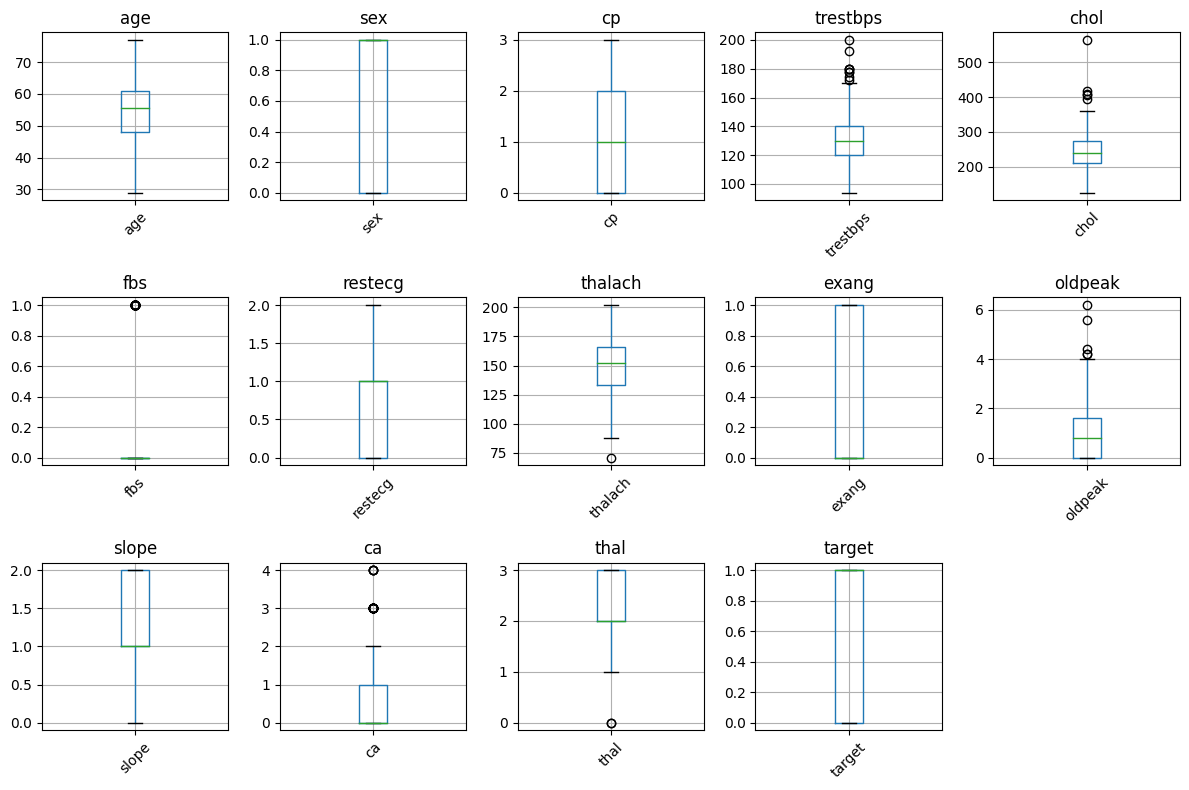

In [11]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
z_scores = stats.zscore(df[df.columns[:-1]])

outlier_index = (abs(z_scores) < 3).all(axis=1)

df = df[outlier_index]

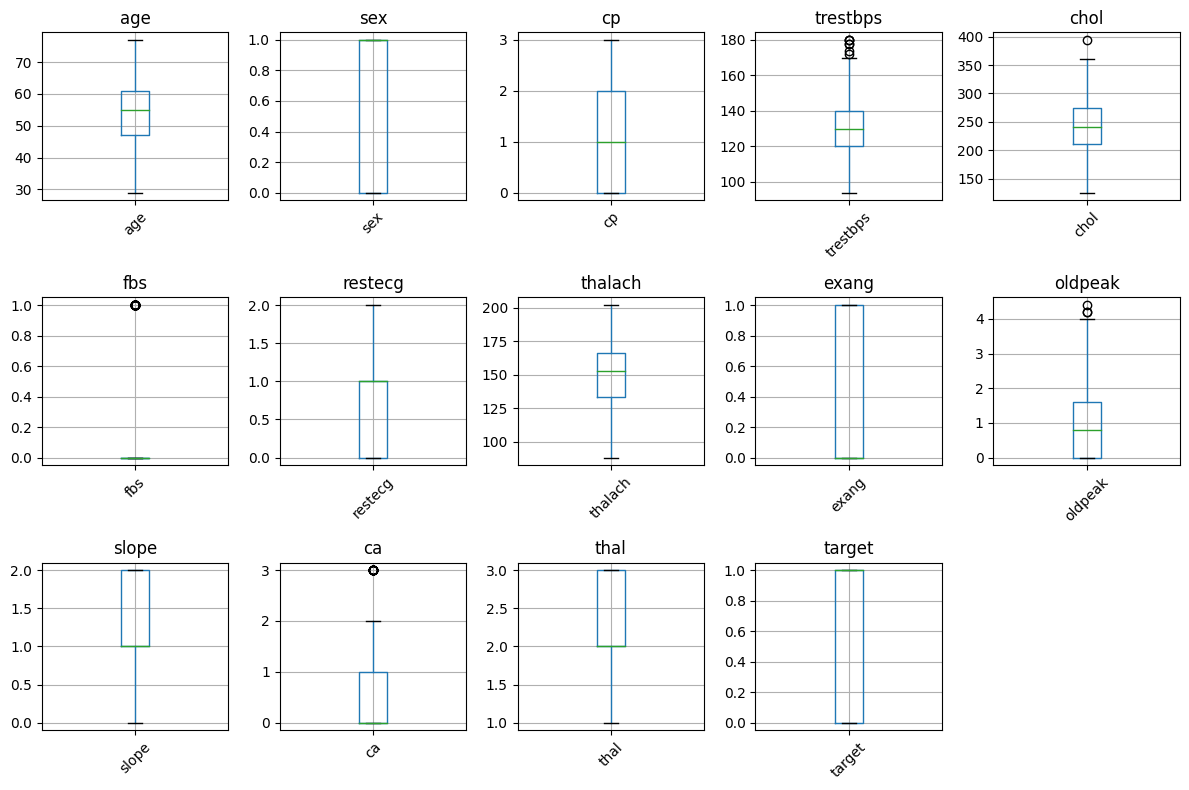

In [13]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    int64  
 1   sex       287 non-null    int64  
 2   cp        287 non-null    int64  
 3   trestbps  287 non-null    int64  
 4   chol      287 non-null    int64  
 5   fbs       287 non-null    int64  
 6   restecg   287 non-null    int64  
 7   thalach   287 non-null    int64  
 8   exang     287 non-null    int64  
 9   oldpeak   287 non-null    float64
 10  slope     287 non-null    int64  
 11  ca        287 non-null    int64  
 12  thal      287 non-null    int64  
 13  target    287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB


# Feature Engineering

In [15]:
df.loc[:, 'age_category'] = pd.cut(df['age'], bins=[0, 20, 35, 50, float('inf')], labels=['Teen', 'Young Adult', 'Adult', 'Old'])
df.loc[:, 'bp_category'] = pd.cut(df['trestbps'], bins=[0, 120, 130, 140, float('inf')], labels=['Normal', 'Prehypertension', 'Stage 1 Hypertension', 'Stage 2 Hypertension'])
df.loc[:, 'chol_category'] = pd.cut(df['chol'], bins=[0, 200, 240, 280, float('inf')], labels=['Normal', 'Borderline High', 'High', 'Very High'])
df.loc[:, 'heart_rate_reserve'] = df['thalach'] - df['restecg']
df.loc[:, 'slope_category'] = pd.cut(df['slope'], bins=[-0.1, 1.5, 2.5], labels=['Flat', 'Moderate'])
df.loc[:, 'vessels_category'] = pd.cut(df['ca'], bins=[-0.1, 0.5, 1.5, 2.5, 3.5], labels=['Low', 'Moderate', 'High', 'Very High'])
df.loc[:, 'thal_category'] = df['thal'].map({1: 'Fixed Defect', 2: 'Reversible Defect', 3: 'Normal'})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 878
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 287 non-null    int64   
 1   sex                 287 non-null    int64   
 2   cp                  287 non-null    int64   
 3   trestbps            287 non-null    int64   
 4   chol                287 non-null    int64   
 5   fbs                 287 non-null    int64   
 6   restecg             287 non-null    int64   
 7   thalach             287 non-null    int64   
 8   exang               287 non-null    int64   
 9   oldpeak             287 non-null    float64 
 10  slope               287 non-null    int64   
 11  ca                  287 non-null    int64   
 12  thal                287 non-null    int64   
 13  target              287 non-null    int64   
 14  age_category        287 non-null    category
 15  bp_category         287 non-null    category


In [17]:
df.to_csv("Heart Disease.csv")

In [18]:
label_encoder = LabelEncoder()

categorical_features = ['age_category', 'bp_category', 'chol_category', 'slope_category', 'vessels_category', 'thal_category']

for feature in categorical_features:
    df.loc[:, feature] = label_encoder.fit_transform(df[feature])

df[categorical_features].head()

,age_category,bp_category,chol_category,slope_category,vessels_category,thal_category
0,1,1,0,1,0,1
1,1,2,0,0,1,1
2,1,3,2,0,1,1
3,1,3,0,1,2,1
4,1,2,3,0,3,2


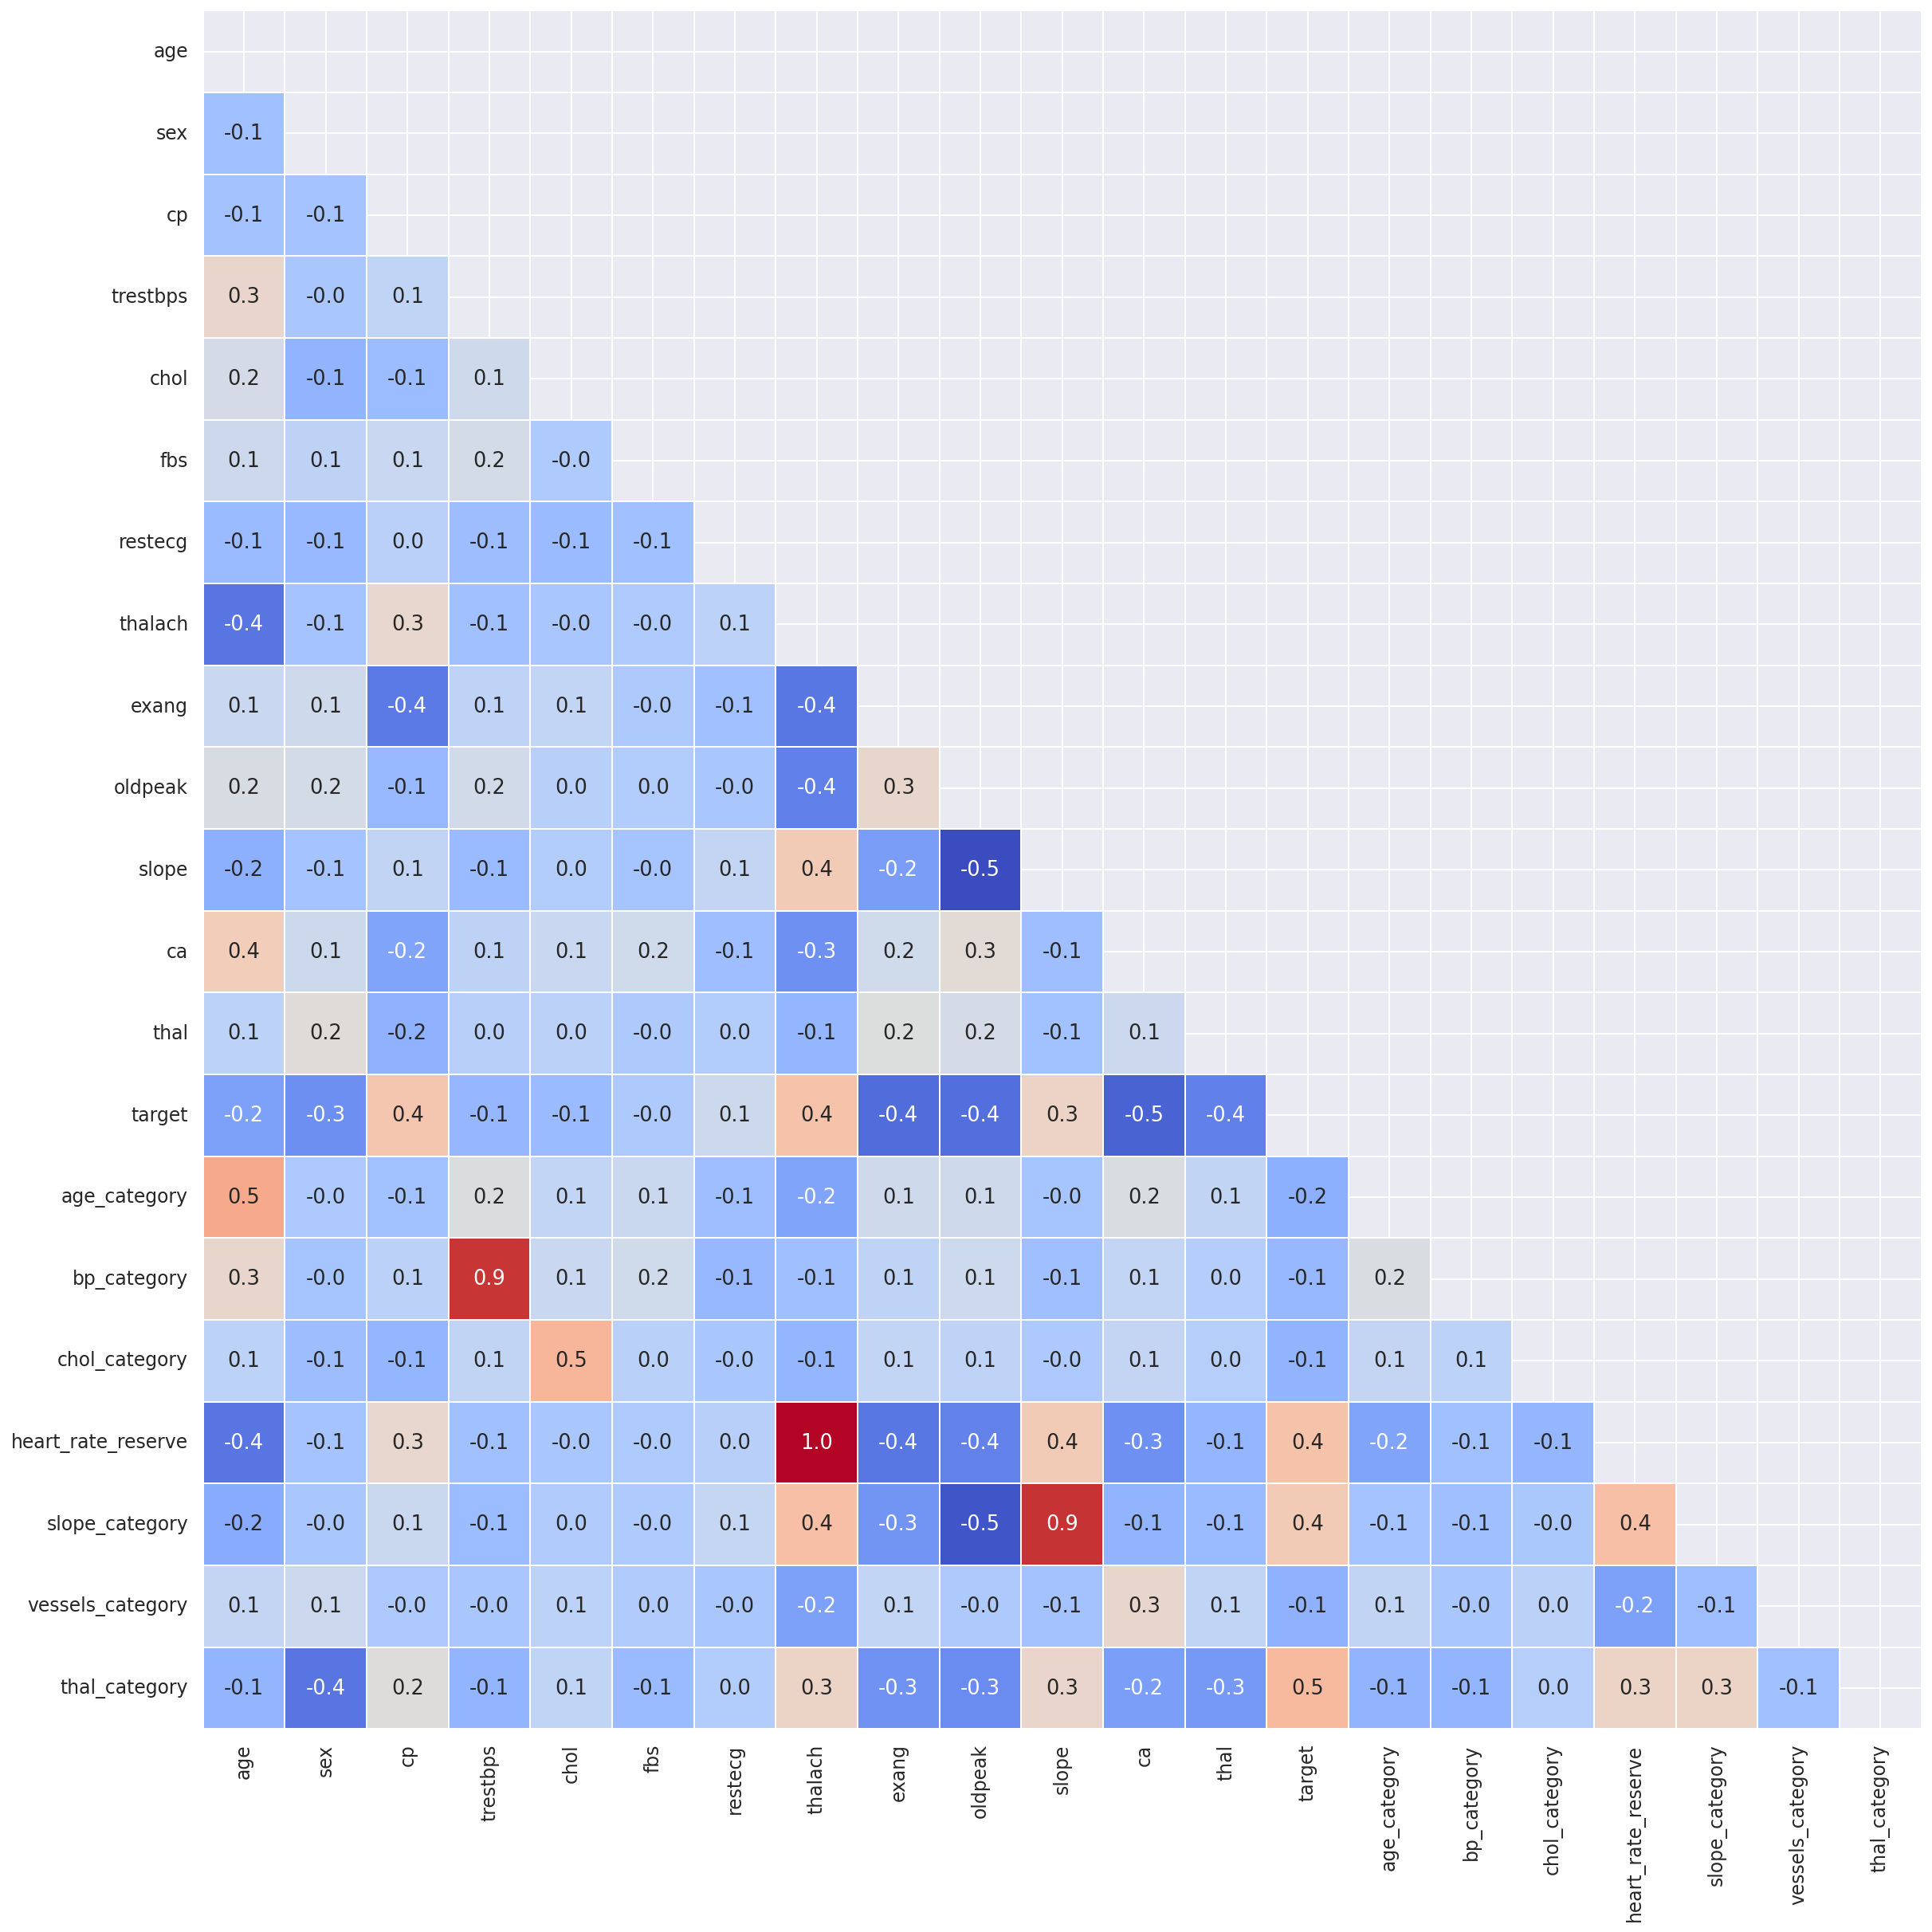

In [19]:
correlation_matrix = df.corr()

mask = np.triu(correlation_matrix.corr())

sns.set(font_scale=1.1)
plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm',
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

Pada fitur target terlihat ada imbalanced data yang harus diatasi nantinya pada data train untuk meningkatkan performa model

In [20]:
target_counts = Counter(df['target'])
print("Distribusi Target:")
print(target_counts)

Distribusi Target:
Counter({1: 158, 0: 129})


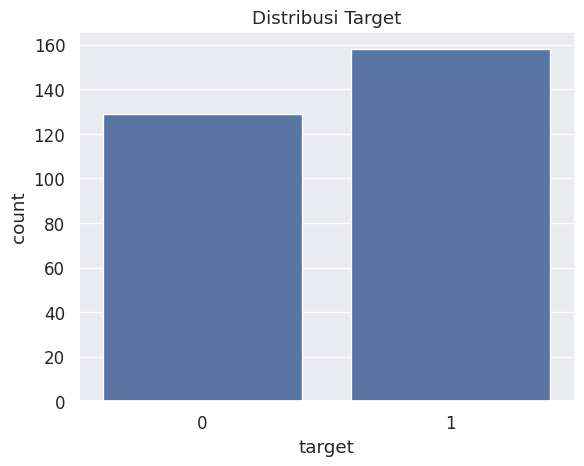

In [21]:
sns.countplot(x=df['target'])
plt.title('Distribusi Target')
plt.show()

# Spliting Data

In [22]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

counter = Counter(y_train)

print("Distribusi Target sebelum SMOTE:")
print(counter)

Distribusi Target sebelum SMOTE:
Counter({1: 128, 0: 101})


In [23]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 101, 1: 128})

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

Percobaan klasifikasi menggunakan beberapa model berikut:
*   Support Vector Machine
*   Random Forest
*   Naive Bayes
*   Extreme Gradient Boosting
*   K-Nearest Neighbour

## Support Vector Machine

In [27]:
svc =  SVC(kernel='rbf', C=3)

svc.fit(X_train, y_train)

svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
svc_roc_auc = roc_auc_score(y_test, svc_predicted)

print("Accuracy of Support Vector Classifier:", svc_acc_score*100,'\n')
print("ROC and AUC Score of Support Vector Classifier:", svc_roc_auc*100,'\n')
print("confussion matrix")
print(svc_conf_matrix)

Accuracy of Support Vector Classifier: 89.65517241379311 

ROC and AUC Score of Support Vector Classifier: 89.64285714285714 

confussion matrix
[[25  3]
 [ 3 27]]


In [28]:
print(classification_report(y_test,svc_predicted))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.90      0.90      0.90        30

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58



## Random Forest Classifier

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=20, max_depth=10)

rf.fit(X_train, y_train)

rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_roc_auc = roc_auc_score(y_test, rf_predicted)

print("Accuracy of Random Forest:", rf_acc_score * 100,'\n')
print("ROC and AUC Score of Support Vector Classifier:", rf_roc_auc*100,'\n')
print("confussion matrix")
print(rf_conf_matrix)

Accuracy of Random Forest: 87.93103448275862 

ROC and AUC Score of Support Vector Classifier: 87.85714285714286 

confussion matrix
[[24  4]
 [ 3 27]]


In [31]:
print(classification_report(y_test,rf_predicted))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.87      0.90      0.89        30

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58



## Naive Bayes

In [33]:
nb = GaussianNB(var_smoothing=0.5)

nb.fit(X_train, y_train)

nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
nb_roc_auc = roc_auc_score(y_test, nbpred)

print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("ROC and AUC Score of Support Vector Classifier:", nb_roc_auc*100,'\n')
print("confussion matrix")
print(nb_conf_matrix)

Accuracy of Naive Bayes model: 87.93103448275862 

ROC and AUC Score of Support Vector Classifier: 87.73809523809524 

confussion matrix
[[23  5]
 [ 2 28]]


In [34]:
print(classification_report(y_test,nbpred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.85      0.93      0.89        30

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58



## Extreme Gradient Boosting

In [35]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=10, colsample_bytree=0.6,
                    reg_lambda=2, colsample_bylevel= 0.6, colsample_bynode= 0.8)

xgb.fit(X_train, y_train)

xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
xgb_roc_auc = roc_auc_score(y_test, xgb_predicted)

print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print("ROC and AUC Score of Support Vector Classifier:", xgb_roc_auc*100,'\n')
print("confussion matrix")
print(xgb_conf_matrix)

Accuracy of Extreme Gradient Boost: 87.93103448275862 

ROC and AUC Score of Support Vector Classifier: 87.73809523809524 

confussion matrix
[[23  5]
 [ 2 28]]


In [36]:
print(classification_report(y_test,xgb_predicted))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.85      0.93      0.89        30

    accuracy                           0.88        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.88      0.88      0.88        58



## K-Nearest Neighbour

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
knn_roc_auc = roc_auc_score(y_test, knn_predicted)

print("Accuracy of K-NeighborsClassifier:", knn_acc_score * 100,'\n')
print("ROC and AUC Score of Support Vector Classifier:", knn_roc_auc*100,'\n')
print("confussion matrix")
print(knn_conf_matrix)

Accuracy of K-NeighborsClassifier: 89.65517241379311 

ROC and AUC Score of Support Vector Classifier: 89.52380952380953 

confussion matrix
[[24  4]
 [ 2 28]]


In [39]:
print(classification_report(y_test,knn_predicted))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.88      0.93      0.90        30

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58



# Model Evaluation

In [48]:
evaluation = pd.DataFrame({'Model': ['Naive Bayes','Random Forest','Extreme Gradient Boost',
                                   'K-Nearest Neighbour','Support Vector Machine'],
                         'Accuracy': [nb_acc_score * 100, rf_acc_score * 100, xgb_acc_score * 100,
                                      knn_acc_score * 100, svc_acc_score * 100],
                         'ROC and AUC Score': [nb_roc_auc*100, rf_roc_auc*100, xgb_roc_auc*100,
                                              knn_roc_auc*100, svc_roc_auc*100]
                           })

In [49]:
evaluation

,Model,Accuracy,ROC and AUC Score
0,Naive Bayes,87.931034,87.738095
1,Random Forest,87.931034,87.857143
2,Extreme Gradient Boost,87.931034,87.738095
3,K-Nearest Neighbour,89.655172,89.523810
4,Support Vector Machine,89.655172,89.642857


In [50]:
evaluation['ROC and AUC Score'] = evaluation['ROC and AUC Score'].round(2)

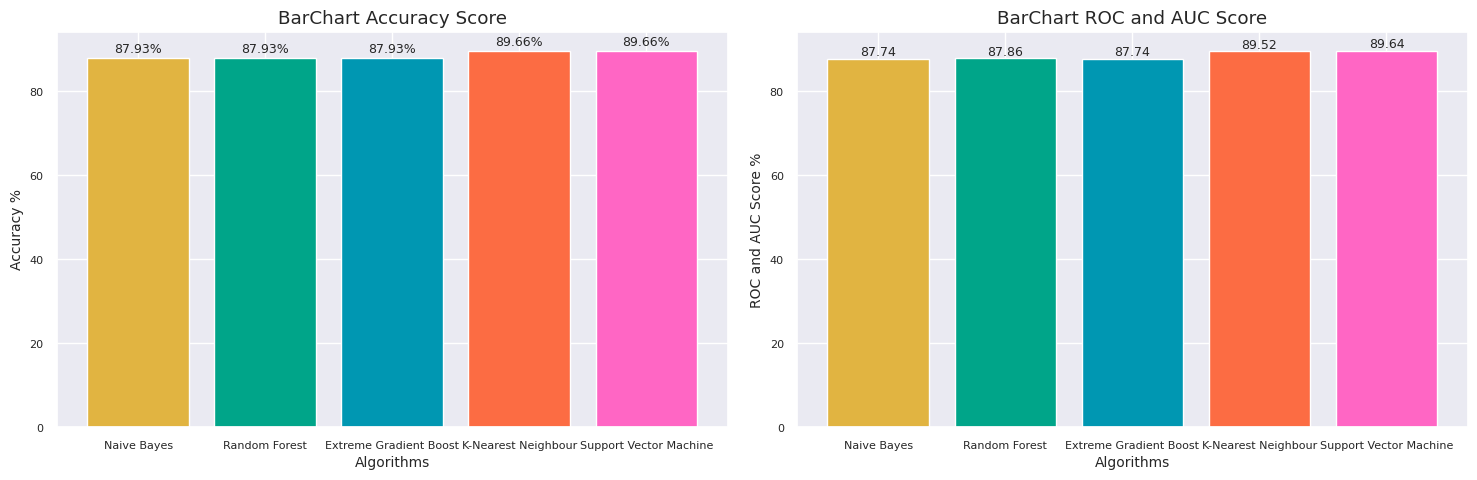

In [53]:
colors = ['#E1B441', '#00A589', '#0097B2', '#FC6C43', '#FF66C4']

# Ukuran figure
plt.figure(figsize=(15, 5))

# Plot bar chart untuk Accuracy
plt.subplot(1, 2, 1)
plt.title("BarChart Accuracy Score")
plt.xlabel("Algorithms", fontsize=10)
plt.ylabel("Accuracy %", fontsize=10)
bars = plt.bar(evaluation['Model'], evaluation['Accuracy'], color=colors)
for bar, label in zip(bars, evaluation['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{label:.2f}%', ha='center', va='bottom', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Plot bar chart untuk ROC and AUC Score
plt.subplot(1, 2, 2)
plt.title("BarChart ROC and AUC Score")
plt.xlabel("Algorithms", fontsize=10)
plt.ylabel("ROC and AUC Score %", fontsize=10)
bars = plt.bar(evaluation['Model'], evaluation['ROC and AUC Score'], color=colors)
for bar, label in zip(bars, evaluation['ROC and AUC Score']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{label:.2f}', ha='center', va='bottom', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Tampilkan plot
plt.tight_layout()
plt.show()

Kita coba ambil 2 algoritma yang paling tinggi akurasi untuk dilihat feature importancenya

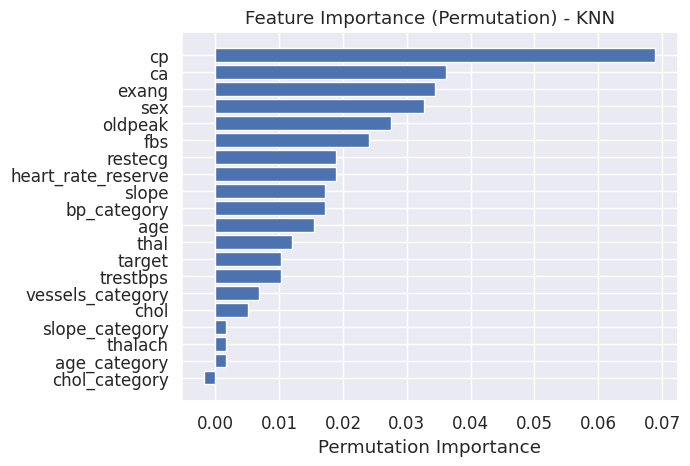

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation) - KNN")
plt.show()

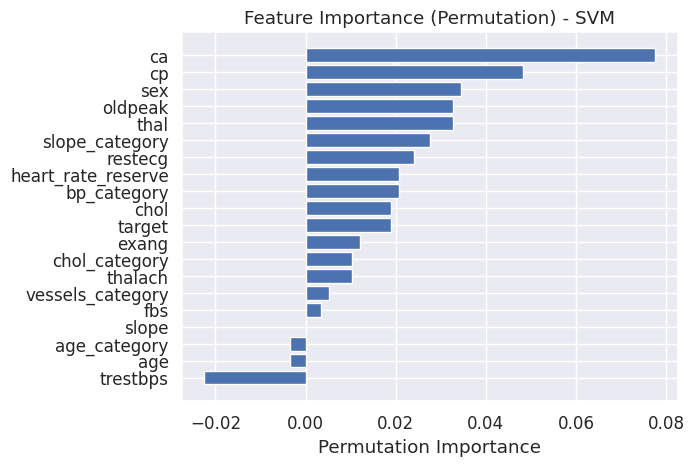

In [ ]:
result = permutation_importance(svc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation) - SVM")
plt.show()